In [1]:
import time
start=time.time()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('./train/train.csv')

In [3]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


In [4]:
data=data.values

In [5]:
data.shape

(1600, 6)

In [6]:
x=data[:,:-1]

In [7]:
y=data[:,-1]

In [8]:
x.shape,y.shape

((1600, 5), (1600,))

In [9]:
u=np.mean(x)
std=np.std(x)
x=(x-u)/std

In [10]:
x

array([[ 0.31139642, -0.92093003, -0.3992678 ,  0.42418404,  0.5423883 ],
       [-0.81200658, -0.16864243, -0.75264729, -1.02857829,  0.61433283],
       [ 0.25471295,  0.15168305, -0.12736142,  0.71564009, -0.16678861],
       ...,
       [ 1.05810433, -0.87478823,  1.74062205, -1.84139222,  0.45969493],
       [-1.24275748,  0.01453923,  1.8672047 , -1.05496863,  0.75192314],
       [-1.85426585, -0.8252779 , -1.42486653,  0.50553954,  1.47126077]])

In [11]:
y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [12]:
def hypothesis(x,theta):
    return np.dot(x,theta)
    
def loss_function(x,y,theta):
    loss=0
    y_=hypothesis(x,theta)
    loss=np.mean((y_-y)**2)
    return loss

def gradient(x,y,theta):
    y_=hypothesis(x,theta)
    grad=np.dot(x.T,(y_-y))
    return grad/x.shape[0]

def gradient_descent(x,y):
    lr_rate=0.05
    weight=np.zeros((x.shape[1],))
    loss_epoch=[]
    epoch=300
    for i in range(epoch):
        print('epoch:',i,end='\r')
        grad=gradient(x,y,weight)
        for j in range(x.shape[1]):
            weight[j]=weight[j]-lr_rate*grad[j]
        loss=loss_function(x,y,weight)
        loss_epoch.append(loss)
    return weight,loss_epoch

In [13]:
weight,loss_epoch=gradient_descent(x,y)

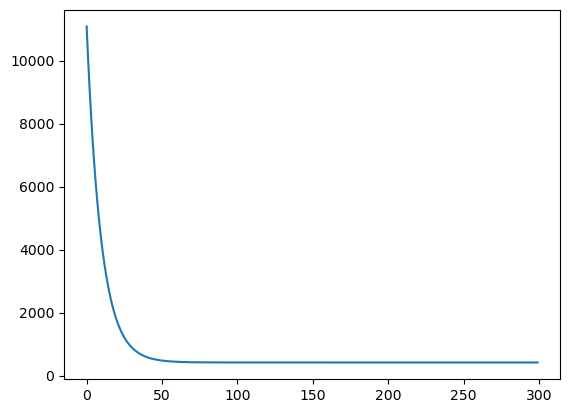

In [14]:
plt.plot(loss_epoch)

In [15]:
weight

array([29.87728284, 93.15158598,  8.29172138, 44.97964773,  2.57994041])

In [16]:
loss_epoch

[11081.785957270493,
 10024.298673510993,
 9072.004726298559,
 8214.407956507037,
 7442.062644486449,
 6746.468076604123,
 6119.973724343574,
 5555.693964781247,
 5047.431379671744,
 4589.607767782094,
 4177.202092644223,
 3805.6946665467894,
 3471.0169422656368,
 3169.5063475465727,
 2897.865654433113,
 2653.126426828894,
 2432.616135786817,
 2233.9285734521545,
 2054.897233828442,
 1893.5713620085821,
 1748.1944036013883,
 1617.1846131292095,
 1499.1176044837164,
 1392.7106483814673,
 1296.8085414075535,
 1210.370888897984,
 1132.4606597905072,
 1062.2338858498417,
 998.93039050897,
 941.8654441089943,
 890.4222526970879,
 844.0451968729072,
 802.2337455642756,
 764.5369771580075,
 730.5486471968572,
 699.9027479554487,
 672.2695106957259,
 647.3518063378849,
 624.8819047216931,
 604.6185566256097,
 586.344366302245,
 569.8634255188816,
 554.9991829974203,
 541.5925257618972,
 529.5000512530444,
 518.5925111846706,
 508.75341001967087,
 499.87774265559784,
 491.8708574501525,
 484.64

In [17]:
y_=hypothesis(x,weight)
list(y_)

[-59.31405260421804,
 -90.89074841759607,
 52.44253689662388,
 8.405164948374319,
 -47.13882226064994,
 -135.97871833768866,
 24.08719053115367,
 -35.172616101092146,
 16.81882618770183,
 -89.38747852453699,
 -47.07618785725624,
 70.82687549250875,
 -105.88950313872395,
 -138.18597748405554,
 -153.47635004110248,
 35.73351727887639,
 -78.41874652720628,
 -43.94512634524545,
 55.16166560838534,
 71.37928072070889,
 -53.36871518164549,
 232.40341937459985,
 -161.1031458790089,
 -150.27261230429417,
 200.12502217522294,
 163.31279831566442,
 -15.365751973551495,
 -19.186681120565712,
 -77.05200250095403,
 234.88339132050706,
 -153.54539756505608,
 -140.3061350458761,
 33.964649087537985,
 -36.23822126478438,
 -140.27115529600084,
 93.64342158388855,
 -91.14005517708432,
 208.9747005781109,
 52.29422915801035,
 -125.00395886679263,
 -97.22582354275384,
 -156.65785949863533,
 8.41405449099379,
 -111.56805671512592,
 -193.60656055444036,
 -105.12260051935145,
 -336.4347339196139,
 10.8345173

In [18]:
y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [19]:
def R2_score(y,y_):
    num=np.sum((y-y_)**2)
    den=np.sum((y-y.mean())**2)
    return (1-(num/den))*100

In [20]:
R2_score(y,y_)

96.59129657459684

In [21]:
def mse(y,y_):
    return (np.sum((y-y_)**2))/y.shape[0]

In [22]:
mse(y,y_)

417.7716720933836

In [23]:
test_data=pd.read_csv('./test/test.csv')

In [24]:
test_data

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925
...,...,...,...,...,...
395,-0.436959,-0.575844,-1.620908,-0.222588,1.086013
396,-0.421324,-2.417543,0.876275,0.844565,0.171646
397,0.554728,1.768243,-0.897787,-1.193661,0.340563
398,-1.627172,0.856471,-0.000566,0.629387,0.453382


In [25]:
test_y=hypothesis(test_data,weight)

In [26]:
test_y

array([ 110.23163152,  113.54939789,  -26.83129075,  -49.349785  ,
       -101.46476427,  -49.79083703,  -81.11184483,   18.88830085,
        169.67513881,  168.74562599, -111.01756147,  -25.8491453 ,
         -8.99182036,  118.57625928,   35.62304682,   40.96364894,
       -195.60674987,   17.70629565,    6.59621002,  132.10270601,
         60.3047483 ,  -67.32293344, -113.81152428,  -12.51853579,
        -63.72050238,    7.00160605,   24.4700461 ,  103.3442901 ,
         19.21682246,  -31.35834163,  106.72067398,  -50.13677659,
        212.9778436 ,  -19.03596263, -234.8547847 ,  150.61347475,
         -7.17397621,    7.71933051, -314.95747713,   72.67689655,
        -86.642206  , -212.78547031, -244.94759152,  130.38510648,
        -79.11921178,  100.92679337,   -8.54628163,   15.72355652,
       -103.49985967,  -32.63748205,    5.85887129, -180.38831025,
         60.59014034, -103.20336813, -111.78058775, -161.73737355,
         57.77102305,  104.30155329,  -80.04552284,   36.87950

In [27]:
test_y=pd.DataFrame(test_y)

In [28]:
test_y

,0
0,110.231632
1,113.549398
2,-26.831291
3,-49.349785
4,-101.464764
...,...
395,-87.346159
396,-192.089141
397,121.032414
398,60.640737


In [29]:
test_y.index.name='id'

In [30]:
test_y.columns =['preds']

In [31]:
test_y

,preds
id,
0,110.231632
1,113.549398
2,-26.831291
3,-49.349785
4,-101.464764
...,...
395,-87.346159
396,-192.089141
397,121.032414


In [32]:
test_y.to_csv('predictions.csv')

In [33]:
end=time.time()
print(f'Time Taken By NoteBook : {end-start} seconds')

Time Taken By NoteBook : 0.7563023567199707 seconds
